# Regression model
#### 1. Read from CSV-file weight-height.csv

In [1]:
import pandas as pd
df = pd.read_csv('weight-height.csv', skiprows=0, delimiter=',')
row_count = len(df)
df.info(); df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


,count,mean,std,min,25%,50%,75%,max
Height,10000.0,66.367560,3.847528,54.263133,63.505620,66.318070,69.174262,78.998742
Weight,10000.0,161.440357,32.108439,64.700127,135.818051,161.212928,187.169525,269.989699


#### 2. Convert lengths from inches to centimeters and weights from pounds to kilograms.

In [2]:
df.iloc[:, [1, -1]] *= [2.54, 0.453592]
df.head()

,Gender,Height,Weight
0,Male,187.571423,109.720985
1,Male,174.706036,73.622732
2,Male,188.239668,96.497550
3,Male,182.196685,99.809504
4,Male,177.499761,93.598619


#### 3. Calculate the means, medians, standard deviations, and variances of the lengths and weights.

In [3]:
import numpy as np

def Calculate(item, label):
    mean_length = np.mean(item)
    median_length = np.median(item)
    std_dev_length = np.std(item)
    variance_length = np.var(item)

    print(f"\n{label.upper()} DISTRIBUTION IN DATA OF {row_count} PERSONS")
    print("Mean: {:.2f}".format(mean_length))
    print("Median: {:.2f}".format(median_length))
    print("Std Dev: {:.2f}".format(std_dev_length))
    print("Var: {:.2f}".format(variance_length))

Calculate(df['Height'], label='Height')
Calculate(df['Weight'], label='Weight')


HEIGHT DISTRIBUTION IN DATA OF 10000 PERSONS
Mean: 168.57
Median: 168.45
Std Dev: 9.77
Var: 95.50

WEIGHT DISTRIBUTION IN DATA OF 10000 PERSONS
Mean: 73.23
Median: 73.12
Std Dev: 14.56
Var: 212.09


#### 4. Visualization

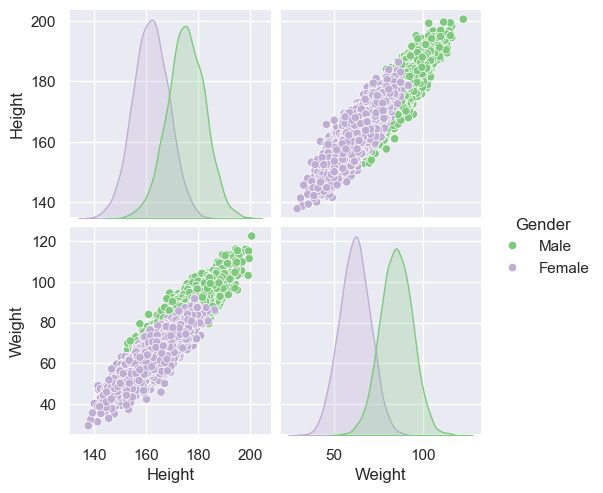

In [4]:
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('notebook')
sns.set_palette('Accent')

sns.pairplot(data=df, hue='Gender')

<Axes: xlabel='Weight', ylabel='Height'>

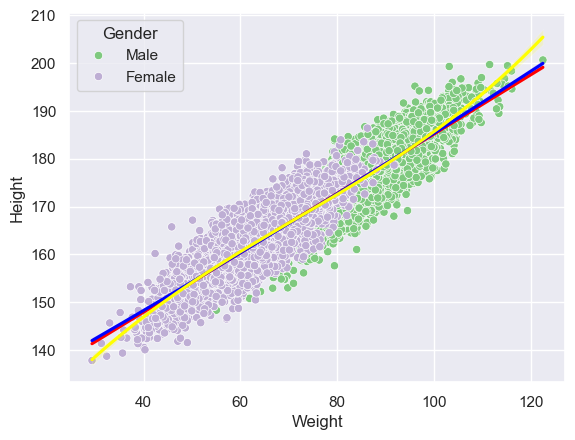

In [5]:
sns.scatterplot(x='Weight',y='Height',data=df, hue='Gender')
sns.regplot(x='Weight', y='Height', data=df, scatter=None, order=1, color='red')
sns.regplot(x='Weight', y='Height', data=df, scatter=None, order=2, color='blue')
sns.regplot(x='Weight', y='Height', data=df, scatter=None, order=3, color='yellow')

##### Clear correlation between Weight and Height.

#### 5. Training and Test Datasets

Logistic Regression Model , classification_report

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report

def train_log(item):
    X = df[['Height', 'Weight']].values  
    y = (df['Gender'] == item).astype(int)  # response variable: 1 for 'Male', 0 for 'Female'

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.2)

    lr = LogisticRegression() 
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)
    
    
    classification_rep = classification_report(y_test, y_pred) 
    
    print(f"\n{item.upper()}")
    print('Classification Report:\n', classification_rep)

train_log('Male')
train_log('Female')


MALE
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       986
           1       0.93      0.92      0.92      1014

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000


FEMALE
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92      1014
           1       0.92      0.93      0.92       986

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000




Linear Regression Model, mean_squared_error and r2_score

In [7]:
def train_lm(item):
    X = df[['Height', 'Weight']].values 
    y = (df['Gender'] == item).astype(int)  # response variable: 1 for 'Male', 0 for 'Female'

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.2)

    
    lm = LinearRegression() 
    lm.fit(X_train, y_train)

    y_train_pred = lm.predict(X_train) 
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred)) 
    r2_train = r2_score(y_train, y_train_pred)

    
   
    y_test_pred = lm.predict(X_test) 
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred)) 
    r2_test = r2_score(y_test, y_test_pred)
    
    print(f"\n{item.upper()}")
    print(f"Training set: RMSE = {rmse_train}, R2 = {r2_train}")
    print(f"Test set: RMSE = {rmse_test}, R2 = {r2_test}")

train_lm('Male')
train_lm('Female')


MALE
Training set: RMSE = 0.29714186247596486, R2 = 0.6468225278332249
Test set: RMSE = 0.29224978669760776, R2 = 0.6582932741825509

FEMALE
Training set: RMSE = 0.29714186247596486, R2 = 0.6468225278332251
Test set: RMSE = 0.29224978669760776, R2 = 0.6582932741825509
